# AIMS

In [1]:
%load_ext autoreload
%autoreload 2

In [27]:
import pandas as pd
import numpy as np
import json

import seaborn as sb
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../") 

import utils.paths as path
from utils.paths2 import direcciones

In [4]:
# Crear los de drive
G_raw, G_processed, G_interim, G_external, G_models, G_reports, G_reports_figures = direcciones('starbucks')

In [24]:
# csv y jsons 
portfolio = pd.read_csv(path.data_processed_dir('portfolio.csv'))
# G_portfolio = pd.read_csv(G_processed/'portfolio.csv')
profile = pd.read_csv(path.data_processed_dir('profile.csv'))
transcript = pd.read_csv(path.data_processed_dir('transcript.csv'))
# transcript = pd.read_json(path.data_raw_dir('transcript.json'), orient='records', lines=True)

# Exploratory

## Portfolio dataset

- check the age column for extreme values (118)
- create readable date format in became_member_on column
- extract its year, month and day from became_member_on column add to columns (for further analysis)
- create new column grouped with age group
- create new column grouped with salary group
- fillna with median values and change its datatype
- rename the id columns for ease of understanding
- create new column grouped with member_since group:

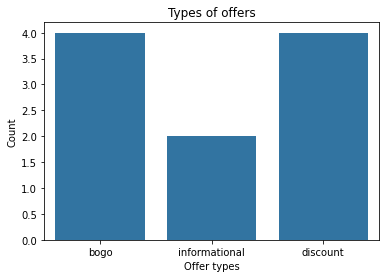

In [9]:
color = sb.color_palette()[0]

sb.countplot(data = portfolio, x = 'offer_type', color = color);
plt.title('Types of offers');
plt.ylabel('Count');
plt.xlabel('Offer types');

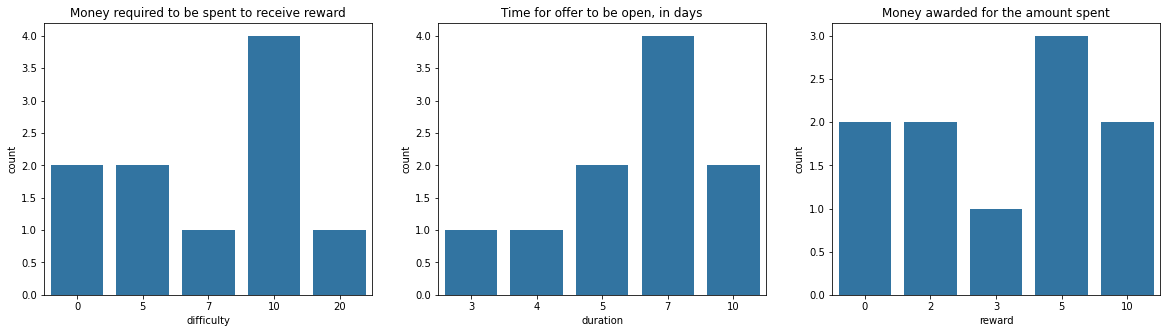

In [10]:
# Creating Subplots for distribution based on difficulty, duration, reward for portfolio data.

plt.figure(figsize = [20,5])

color = sb.color_palette()[0]
plt.subplot(1,3,1)

sb.countplot(data = portfolio, x = 'difficulty', color = color);
plt.title('Money required to be spent to receive reward');
plt.ylabel('count');
plt.xlabel('difficulty');

plt.subplot(1,3,2)
sb.countplot(data = portfolio, x = 'duration', color = color);
plt.title('Time for offer to be open, in days');
plt.ylabel('count');
plt.xlabel('duration');

plt.subplot(1,3,3)
sb.countplot(data = portfolio, x = 'reward', color = color);
plt.title('Money awarded for the amount spent');
plt.ylabel('count');
plt.xlabel('reward');

In [12]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id,email,web,mobile,social
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0


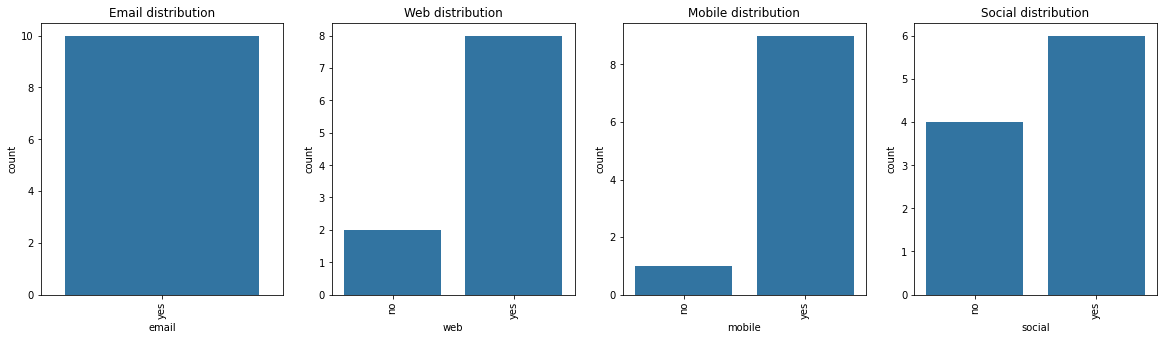

In [18]:
# Creating Subplots for distribution based on email, web, mobile and social for portfolio data.

plt.figure(figsize = [20,5])

color = sb.color_palette()[0]

plt.subplot(1,4,1)
x = sb.countplot(data = portfolio, x = 'email', color = color);
plt.title('Email distribution');
plt.ylabel('count');
plt.xlabel('email');
xlabels = ['yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

plt.subplot(1,4,2)
x = sb.countplot(data = portfolio, x = 'web', color = color);
plt.title('Web distribution');
plt.ylabel('count');
plt.xlabel('web');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

plt.subplot(1,4,3)
x = sb.countplot(data = portfolio, x = 'mobile', color = color);
plt.title('Mobile distribution');
plt.ylabel('count');
plt.xlabel('mobile');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

plt.subplot(1,4,4)
x = sb.countplot(data = portfolio, x = 'social', color = color);
plt.title('Social distribution');
plt.ylabel('count');
plt.xlabel('social');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

## Profile dataset

- What is the Gender Distribution of Starbucks Customers?
- What is the Age Distribution of Starbucks Customers?
- What is the Income Distribution of Starbucks Customers?

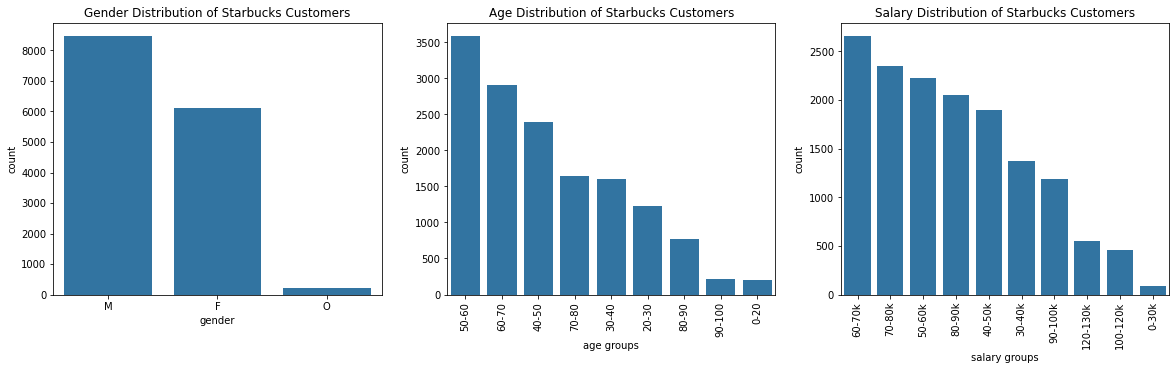

In [20]:
# Creating Subplots for distribution based on gender, age_groups, salary_groups for the cleaned Profile data:

plt.figure(figsize = [20,5])

color = sb.color_palette()[0]
plt.subplot(1,3,1)
order = ['M',  'F',  'O']
sb.countplot(data = profile, x = 'gender', color = color, order = order);
plt.title('Gender Distribution of Starbucks Customers');
plt.ylabel('count');
plt.xlabel('gender');

plt.subplot(1,3,2)
order = [5, 6, 4, 7, 3, 2, 8, 9, 1]
x = sb.countplot(data = profile, x = 'age_groups', color = color, order = order);
plt.title('Age Distribution of Starbucks Customers');
plt.ylabel('count');
plt.xlabel('age groups');
xlabels = ['50-60', '60-70', '40-50', '70-80', '30-40', '20-30', '80-90', '90-100', '0-20']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

plt.subplot(1,3,3)
order = [4, 5, 6, 2, 3, 7, 8, 9, 10, 0]
x = sb.countplot(data = profile, x = 'salary_groups', color = color, order = order);
plt.title('Salary Distribution of Starbucks Customers');
plt.ylabel('count');
plt.xlabel('salary groups');
xlabels = ['60-70k', '70-80k', '50-60k', '80-90k', '40-50k', '30-40k', '90-100k', '120-130k', '100-120k', '0-30k']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

According to graph,

- The proprtion of males(around 9000) is slightly more than those of the females(around 6000) and very small amount of others.
- Age group range from 40-70 frequently visits starbucks.
- There is a decrease in the number of customers as after 70K, mentioning as the income increases people spend less on coffee.

How many customers enrolled yearly ?

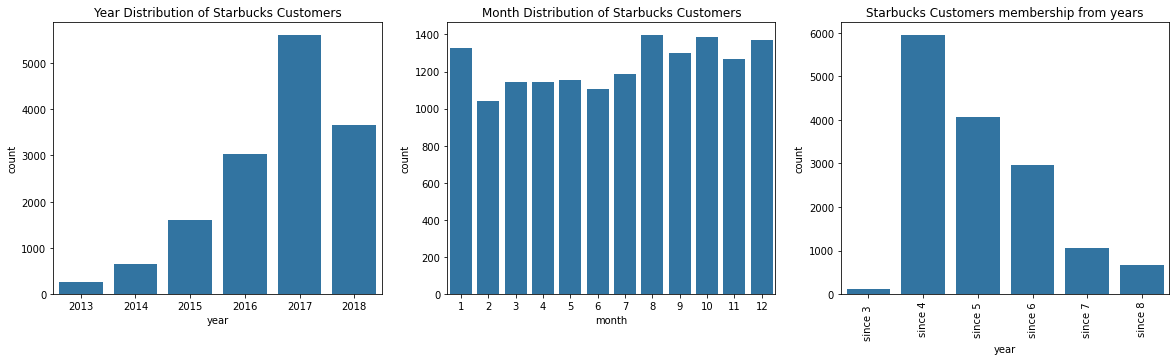

In [21]:
# Creating Subplots for distribution based on year, month, member_since for the cleaned Profile data:

plt.figure(figsize = [20,5])

color = sb.color_palette()[0]
plt.subplot(1,3,1)
sb.countplot(data = profile, x = 'member_year', color = color);
plt.title('Year Distribution of Starbucks Customers');
plt.ylabel('count');
plt.xlabel('year');

plt.subplot(1,3,2)
sb.countplot(data = profile, x = 'member_month', color = color);
plt.title('Month Distribution of Starbucks Customers');
plt.ylabel('count');
plt.xlabel('month');

plt.subplot(1,3,3)
x = sb.countplot(data = profile, x = 'member_since_year', color = color);
plt.title('Starbucks Customers membership from years');
plt.ylabel('count');
plt.xlabel('year');
xlabels = ['since 3 ', 'since 4', 'since 5', 'since 6', 'since 7', 'since 8']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

According to graph, Members of the starbucks increased exponentially from 2013 and reached its highest in 2017 which later declines steadily.

- Which gender has the highest yearly membership?

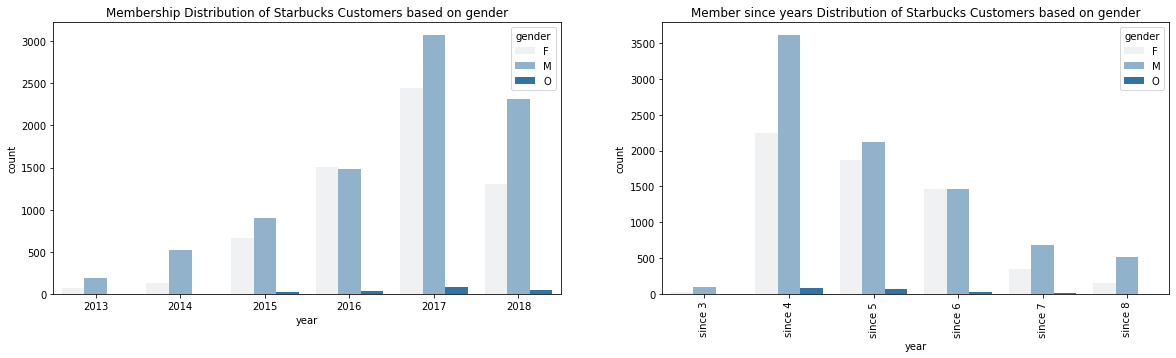

In [22]:
# Visualize distribution of membership years grouped by success:

plt.figure(figsize = [20,5])
color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data = profile, x = 'member_year', hue = 'gender', color = color);
plt.title('Membership Distribution of Starbucks Customers based on gender');
plt.ylabel('count');
plt.xlabel('year');

plt.subplot(1,2,2)
x = sb.countplot(data = profile, x = 'member_since_year', hue = 'gender', color = color);
plt.title('Member since years Distribution of Starbucks Customers based on gender');
plt.ylabel('count');
plt.xlabel('year');
xlabels = ['since 3', 'since 4', 'since 5', 'since 6', 'since 7', 'since 8']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

According to graph, With the increase in popularity of starbucks, people have joined starbucks yearly exponentially and reached its zenith in 2017. More men have joined than the female and very few from others every year.

- Which gender has the highest Annual income?

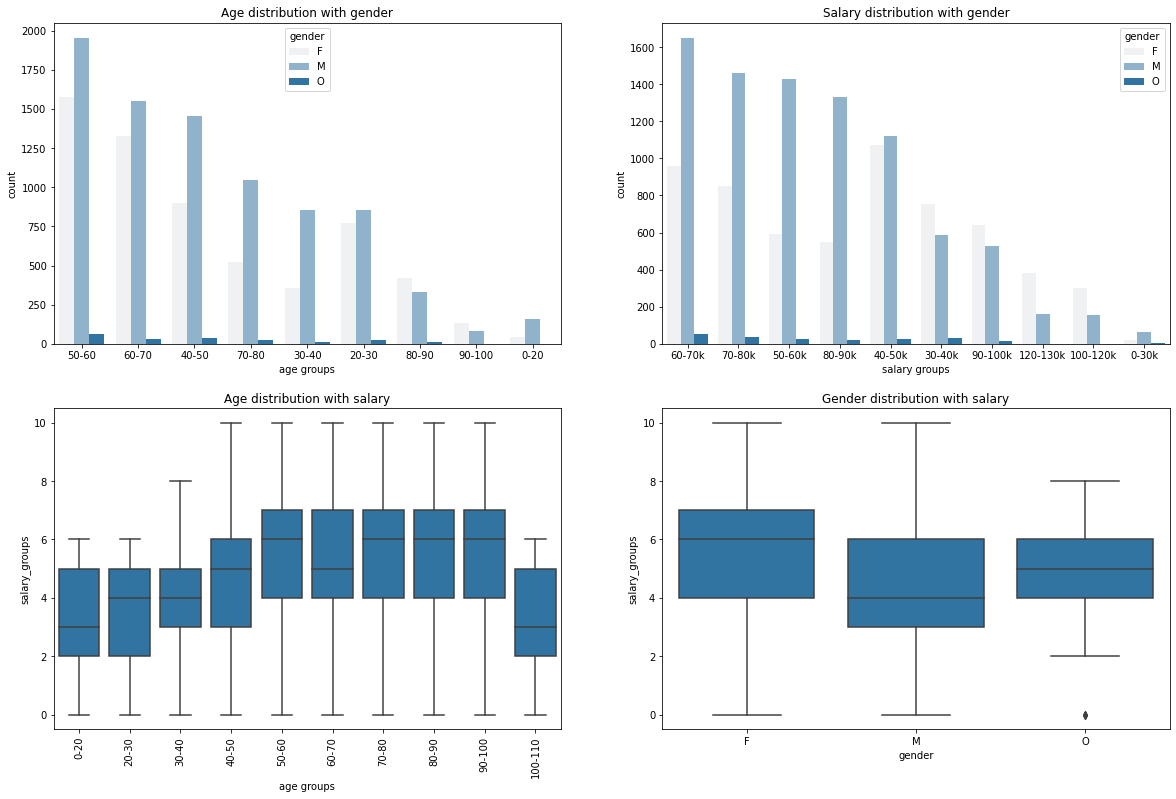

In [23]:
# Visualize distribution of age, salarys with gender:

plt.subplots(2, 2, figsize=(20, 13))
color = sb.color_palette()[0]


plt.subplot(2,2,1)
order = [5, 6, 4, 3, 2, 7, 8, 9, 1]
x = sb.countplot(data = profile, x = 'age_groups', order = order, hue = 'gender', color = color);
plt.title('Age distribution with gender');
plt.ylabel('count');
plt.xlabel('age groups');
xlabels = ['50-60', '60-70', '40-50', '70-80', '30-40', '20-30', '80-90', '90-100', '0-20']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

plt.subplot(2,2,2)
order = [4, 5, 2, 3, 6, 7, 8, 9, 10, 0]
x = sb.countplot(data = profile, x = 'salary_groups', order = order, hue = 'gender', color = color);
plt.title('Salary distribution with gender');
plt.ylabel('count');
plt.xlabel('salary groups');
xlabels = ['60-70k', '70-80k', '50-60k', '80-90k', '40-50k', '30-40k', '90-100k', '120-130k', '100-120k', '0-30k']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

# Visualize distribution of age v/s salarys and salary v/s gender:

plt.subplot(2,2,3)
x = sb.boxplot(data = profile, x = 'age_groups', y = 'salary_groups', color = color);
plt.title('Age distribution with salary');
plt.ylabel('salary_groups');
plt.xlabel('age groups');
xlabels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

plt.subplot(2,2,4)
sb.boxplot(data = profile, x = 'gender', y = 'salary_groups', color = color);
plt.title('Gender distribution with salary');
plt.ylabel('salary_groups');
plt.xlabel('gender');

According to graph, The income for females(around 70k) is higher than males and others.

The count of male customers in low-income level is slightly higher than that of female and other customers

## Transcript dataset

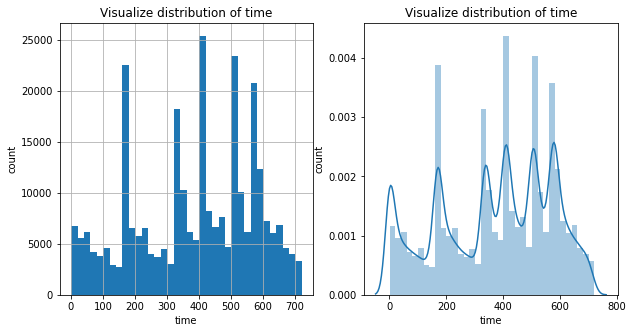

In [28]:
# Visualize distribution of time:

plt.figure(figsize = [10,5])
color = sb.color_palette()[0]
bins = np.arange(1, transcript['time'].max()+20, 20)

plt.subplot(1,2,1)
transcript.time.hist(bins = bins);
plt.title('Visualize distribution of time');
plt.ylabel('count');
plt.xlabel('time');

plt.subplot(1,2,2)
sb.distplot(transcript.time, bins = bins)
plt.title('Visualize distribution of time');
plt.ylabel('count');
plt.xlabel('time');

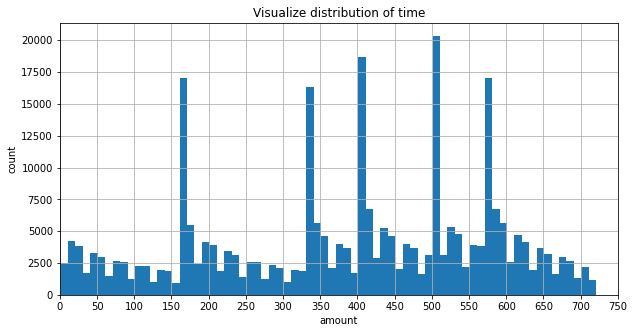

In [29]:
# Visualize distribution of amount:

plt.figure(figsize = [10,5])
color = sb.color_palette()[0]
bins = np.arange(1, transcript['amount'].max()+10, 10)

transcript.time.hist(bins = bins);
plt.title('Visualize distribution of time');
plt.ylabel('count');
plt.xlabel('amount');
tick = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750]
label = ['{}'.format(ele) for ele in tick]
plt.xticks(tick, label);
plt.xlim((0,750));

- What is the distribution of event in transcripts?
- What is the percent of trasactions and offers in the event?

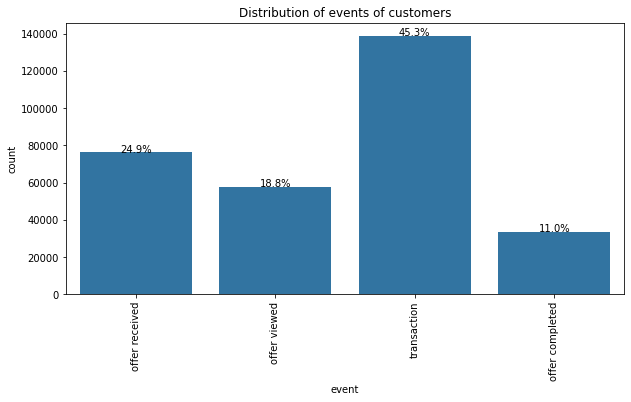

In [30]:
# Visualize distribution of events:

plt.figure(figsize = [10,5])
color = sb.color_palette()[0]

sb.countplot(data = transcript, x = 'event', color = color);
plt.title('Distribution of events of customers');
plt.ylabel('count');
plt.xlabel('event');

value_sum = transcript['event'].value_counts().sum()
value = transcript['event'].value_counts()

locs, labels = plt.xticks(rotation = 90) 

for loc, label in zip(locs, labels):

    count = value[label.get_text()]
    text = '{:0.1f}%'.format(100 * count/value_sum)

    plt.text(loc, count+2, text, ha = 'center', color = 'black');

According to graph, We can see that most of the transcripts are transactions.

Nearly 45.3% are transactions and 54.7% are offers.

- What is the distribution of event in transcripts?
- What is the percent of trasactions and offers in the event?

In [31]:
new = transcript[transcript['event'] != 'transaction']
new = pd.DataFrame(new)
new.head()

,offer_completed,offer_recived,offer_viewed,transaction,customer_id,event,time,offer_id,amount,reward
0,0,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,NaN
1,0,1,0,0,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,NaN
2,0,1,0,0,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,0.0,NaN
3,0,1,0,0,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,NaN
4,0,1,0,0,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,NaN


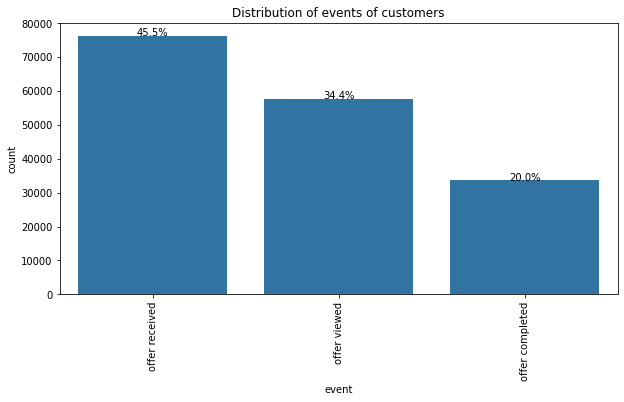

In [32]:
# Visualize distribution of events without transcations count:

plt.figure(figsize = [10,5])
color = sb.color_palette()[0]

sb.countplot(data = new, x = new['event'], color = color);
plt.title('Distribution of events of customers');
plt.ylabel('count');
plt.xlabel('event');

value_sum = new['event'].value_counts().sum()
value = new['event'].value_counts()
locs, labels = plt.xticks(rotation = 90) 

for loc, label in zip(locs, labels):

    count = value[label.get_text()]
    text = '{:0.1f}%'.format(100 * count/value_sum)

    plt.text(loc, count+2, text, ha = 'center', color = 'black');

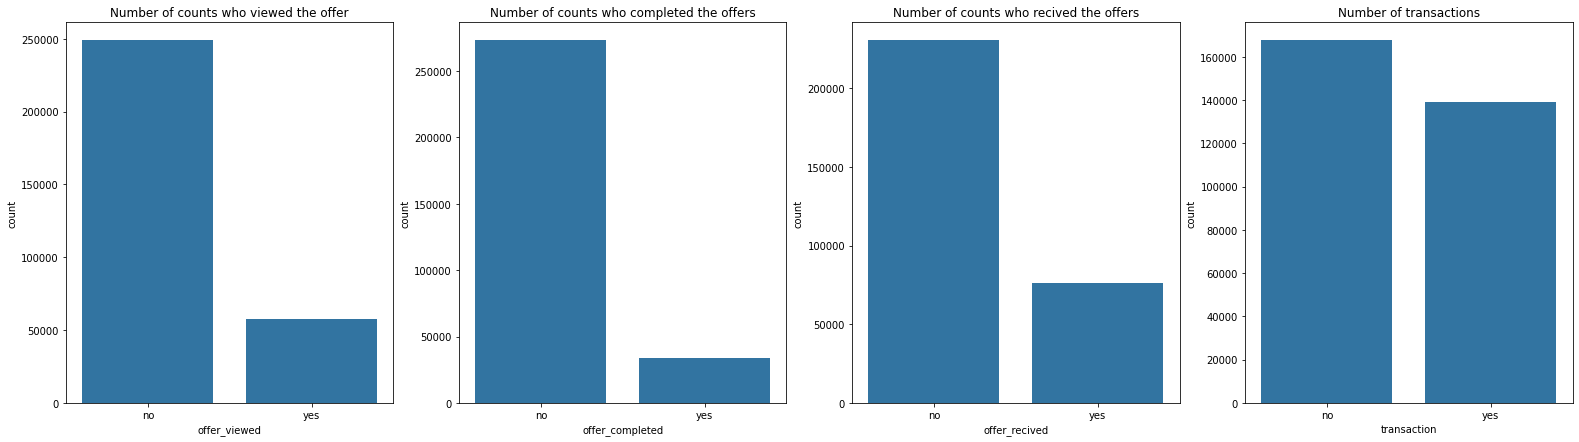

In [33]:
# Graph for Number of counts who recived, viewed, completed the offers:

plt.figure(figsize = [27,7])
color = sb.color_palette()[0]

plt.subplot(1,4,1)
x = sb.countplot(data = transcript, x = 'offer_viewed', color = color);
plt.title('Number of counts who viewed the offer');
plt.ylabel('count');
plt.xlabel('offer_viewed');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

plt.subplot(1,4,2)
x = sb.countplot(data = transcript, x = 'offer_completed', color = color);
plt.title('Number of counts who completed the offers');
plt.ylabel('count');
plt.xlabel('offer_completed');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

plt.subplot(1,4,3)
x = sb.countplot(data = transcript, x = 'offer_recived', color = color);
plt.title('Number of counts who recived the offers');
plt.ylabel('count');
plt.xlabel('offer_recived');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

plt.subplot(1,4,4)
x = sb.countplot(data = transcript, x = 'transaction', color = color);
plt.title('Number of transactions');
plt.ylabel('count');
plt.xlabel('transaction');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

## Merge the three data sets with common columns into one for futhur analysis:

In [35]:
# merge the transcript and profile dataframes on customer_id column:

data = transcript.merge(profile, on = ['customer_id'])
data.head()

,offer_completed,offer_recived,offer_viewed,transaction,customer_id,event,time,offer_id,amount,reward,gender,age,became_member_on,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year
0,0,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5
1,0,0,1,0,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5
2,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,NaN,19.89,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5
3,1,0,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,5.0,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5
4,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,NaN,17.78,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5


In [36]:
data.shape

(272762, 21)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   offer_completed        272762 non-null  int64  
 1   offer_recived          272762 non-null  int64  
 2   offer_viewed           272762 non-null  int64  
 3   transaction            272762 non-null  int64  
 4   customer_id            272762 non-null  object 
 5   event                  272762 non-null  object 
 6   time                   272762 non-null  int64  
 7   offer_id               148805 non-null  object 
 8   amount                 272762 non-null  float64
 9   reward                 32444 non-null   float64
 10  gender                 272762 non-null  object 
 11  age                    272762 non-null  int64  
 12  became_member_on       272762 non-null  object 
 13  income                 272762 non-null  int64  
 14  age_groups             272762 non-nu

In [38]:
new_data = data.merge(portfolio, how = 'left', on = ['offer_id'])
new_data.head()

,offer_completed,offer_recived,offer_viewed,transaction,customer_id,event,time,offer_id,amount,reward_x,gender,age,became_member_on,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year,reward_y,channels,difficulty,duration,offer_type,email,web,mobile,social
0,0,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0
1,0,0,1,0,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0
2,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,NaN,19.89,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.00,5.0,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0
4,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,NaN,17.78,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
new_data.shape

(272762, 30)

After merging the three data sets, the final new_data set contains 272762 rows and 30 colomns.

In [41]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   offer_completed        272762 non-null  int64  
 1   offer_recived          272762 non-null  int64  
 2   offer_viewed           272762 non-null  int64  
 3   transaction            272762 non-null  int64  
 4   customer_id            272762 non-null  object 
 5   event                  272762 non-null  object 
 6   time                   272762 non-null  int64  
 7   offer_id               148805 non-null  object 
 8   amount                 272762 non-null  float64
 9   reward_x               32444 non-null   float64
 10  gender                 272762 non-null  object 
 11  age                    272762 non-null  int64  
 12  became_member_on       272762 non-null  object 
 13  income                 272762 non-null  int64  
 14  age_groups             272762 non-nu

- Dataframe consisting of all the data related to Offers are seperated in to (offer_data)
- Dataframe consisting of all the data related to Transactions are seperated in to (transaction_data).

In [42]:
# Seperate the three offer columns from the transaction column

transaction_df = new_data[new_data['event'] == 'transaction']
transaction_df.head()

,offer_completed,offer_recived,offer_viewed,transaction,customer_id,event,time,offer_id,amount,reward_x,gender,age,became_member_on,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year,reward_y,channels,difficulty,duration,offer_type,email,web,mobile,social
2,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,transaction,132,NaN,19.89,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,transaction,144,NaN,17.78,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,transaction,222,NaN,19.67,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,transaction,240,NaN,29.72,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,0,0,1,78afa995795e4d85b5d9ceeca43f5fef,transaction,378,NaN,23.93,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
transaction_df.shape

(123957, 30)

In [44]:
# Seperate the three offer columns from the transaction column

offer_df = new_data[new_data['transaction'] != 1]
offer_df.head()

,offer_completed,offer_recived,offer_viewed,transaction,customer_id,event,time,offer_id,amount,reward_x,gender,age,became_member_on,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year,reward_y,channels,difficulty,duration,offer_type,email,web,mobile,social
0,0,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0
1,0,0,1,0,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0
3,1,0,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer completed,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,5.0,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo,1.0,1.0,1.0,0.0
5,0,1,0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,168,5a8bc65990b245e5a138643cd4eb9837,0.0,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,0.0,"['email', 'mobile', 'social']",0.0,3.0,informational,1.0,0.0,1.0,1.0
6,0,0,1,0,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,216,5a8bc65990b245e5a138643cd4eb9837,0.0,NaN,F,75,2017-05-09,100000,7,8,2017,5,9,1971,5,0.0,"['email', 'mobile', 'social']",0.0,3.0,informational,1.0,0.0,1.0,1.0


In [45]:
offer_df.shape

(148805, 30)

In [46]:
print('mean time value: ', offer_df.time.mean())
print('median time value: ',offer_df.time.median())

mean time value:  354.57022277477233
median time value:  408.0


In [47]:
print('mean age value: ', offer_df.age.mean())
print('median age value: ',offer_df.age.median())
print('total age value: ', offer_df.age.sum())
print('maximum age value: ',offer_df.age.max())
print('minimum age value: ',offer_df.age.min())

mean age value:  54.77928161016095
median age value:  56.0
total age value:  8151431
maximum age value:  101
minimum age value:  18


In [48]:
# Rearrange the offer_id dataset and del columns:

offer_df.reset_index(inplace=True)
del offer_df['index']

In [49]:

# Drop columns:

offer_df.drop(['channels', 'transaction', 'amount', 'reward_x'], axis = 1, inplace = True)

### Data Labelling:

Label the columns - offer_id. offer_type, gender, and the unique customer_ids

In [51]:
from sklearn import preprocessing

In [52]:
# label encoding - offer_id (10 different IDs) from the portfolio data set:

le_1 = preprocessing.LabelEncoder()
le_1.fit(portfolio['offer_id'])

offer_df['offer_id'] = le_1.fit_transform(offer_df['offer_id'].astype(str))

In [53]:
# label encoding - offer_type from the portfolio data set (3 different types, bogo-discount-informational):

le_2 = preprocessing.LabelEncoder()
le_2.fit(portfolio.offer_type)

offer_df['offer_type'] = le_2.fit_transform(offer_df['offer_type'].astype(str))

In [54]:
# label encoding for gender from the profile data set(3 different types, male-female-other):

le_3 = preprocessing.LabelEncoder()
le_3.fit(profile['gender'])

offer_df['gender'] = le_3.fit_transform(offer_df['gender'].astype(str))

In [55]:
# label the unique customer ids, create a mapper function to avoid duplication:

def id_mapper():
    """
    INPUT: 
    col_name (str): name of the column whose values are to be changed
    
    OUTPUT:
    id_encoded (list): list of the mapped integers for each value
    
    Description:
    This function will map integers to such '912b9f623b9e4b4eb99b6dc919f09a93' long values.
    
    """
    coded_dict = dict()
    cter = 1
    id_encoded = []
    
    for val in offer_df['customer_id']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        id_encoded.append(coded_dict[val])
    return id_encoded

id_encoded = id_mapper()
del offer_df['customer_id']
offer_df['customer_ids'] = id_encoded

# show header
offer_df.sample(5)

,offer_completed,offer_recived,offer_viewed,event,time,offer_id,gender,age,became_member_on,income,age_groups,salary_groups,member_year,member_month,member_day,members_since_in_days,member_since_year,reward_y,difficulty,duration,offer_type,email,web,mobile,social,customer_ids
77014,0,1,0,offer received,168,1,1,26,2018-07-14,43000,2,3,2018,7,14,1540,4,3.0,7.0,7.0,1,1.0,1.0,1.0,1.0,7278
20510,1,0,0,offer completed,510,4,0,32,2017-07-30,47000,3,3,2017,7,30,1889,5,10.0,10.0,5.0,0,1.0,1.0,1.0,1.0,1928
140407,0,1,0,offer received,576,8,1,75,2017-08-09,92000,7,8,2017,8,9,1879,5,5.0,5.0,5.0,0,1.0,1.0,1.0,1.0,13768
125105,0,1,0,offer received,168,3,0,71,2016-05-17,32000,7,2,2016,5,17,2328,6,0.0,0.0,4.0,2,1.0,1.0,1.0,0.0,12010
92559,0,0,1,offer viewed,336,6,0,48,2015-09-05,57000,4,4,2015,9,5,2583,7,5.0,5.0,7.0,0,1.0,1.0,1.0,0.0,8750


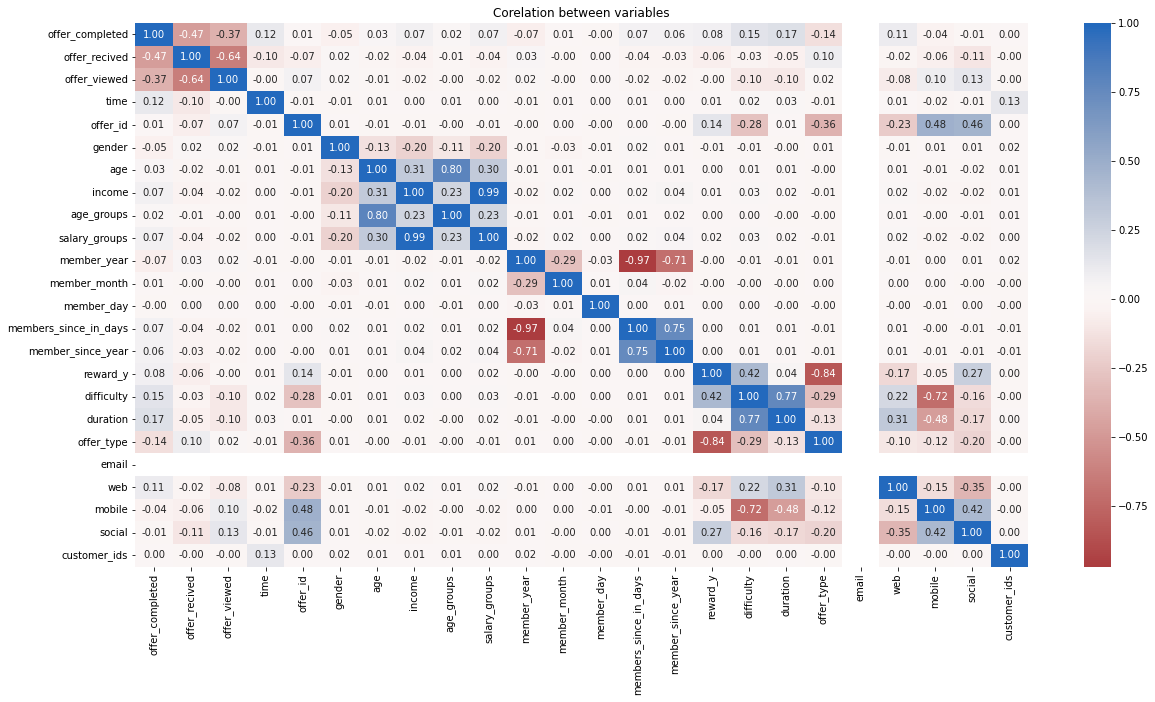

In [56]:
# heat map for cleaned dataset:

plt.figure(figsize = [20,10])

sb.heatmap(offer_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Corelation between variables');

In [57]:
offer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148805 entries, 0 to 148804
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   offer_completed        148805 non-null  int64  
 1   offer_recived          148805 non-null  int64  
 2   offer_viewed           148805 non-null  int64  
 3   event                  148805 non-null  object 
 4   time                   148805 non-null  int64  
 5   offer_id               148805 non-null  int32  
 6   gender                 148805 non-null  int32  
 7   age                    148805 non-null  int64  
 8   became_member_on       148805 non-null  object 
 9   income                 148805 non-null  int64  
 10  age_groups             148805 non-null  int64  
 11  salary_groups          148805 non-null  int64  
 12  member_year            148805 non-null  int64  
 13  member_month           148805 non-null  int64  
 14  member_day             148805 non-nu

## Exploratory Data Analysis for merged data (new_data) dataset:

- What are the Offer types amongst ages, gender and income groups?

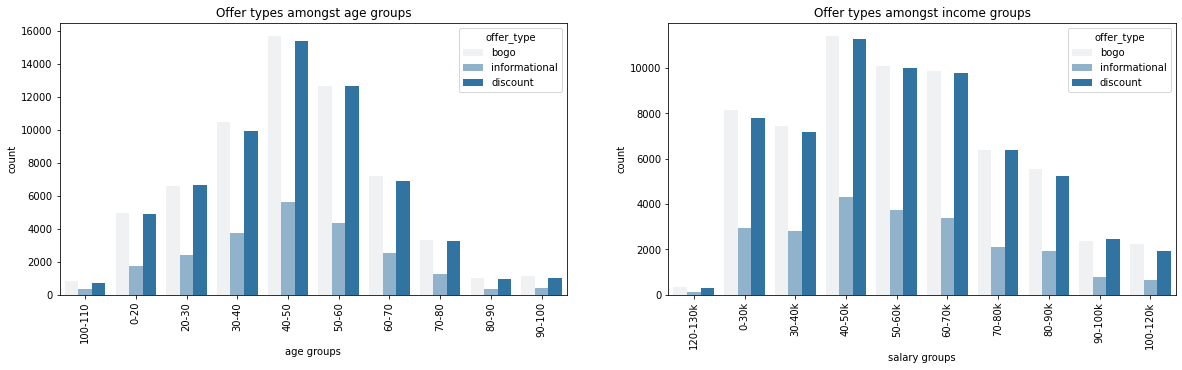

In [59]:
# Graph for Offer types amongst ages, salary groups:

plt.figure(figsize = [20,5])
color = sb.color_palette()[0]

plt.subplot(1,2,1)
x = sb.countplot(data = new_data, x = 'age_groups', hue = 'offer_type', color = color);
plt.title('Offer types amongst age groups');
plt.ylabel('count');
plt.xlabel('age groups');
xlabels = ['100-110', '0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

plt.subplot(1,2,2)
x = sb.countplot(data = new_data, x = 'salary_groups', hue = 'offer_type', color = color);
plt.title('Offer types amongst income groups');
plt.ylabel('count');
plt.xlabel('salary groups');
xlabels = ['120-130k', '0-30k', '30-40k', '40-50k', '50-60k', '60-70k', '70-80k', '80-90k', '90-100k', '100-120k']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 90);

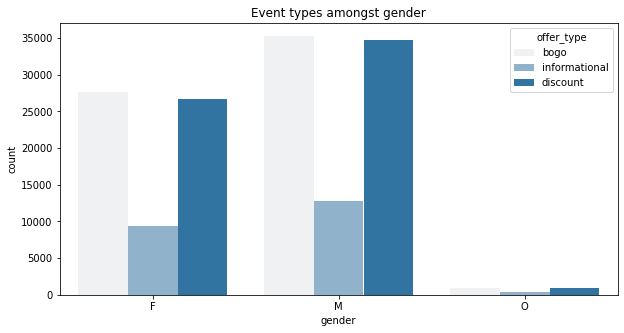

In [60]:
# Graph for event types amongst gender:

plt.figure(figsize = [10,5])
color = sb.color_palette()[0]

sb.countplot(data = new_data, x = 'gender', hue = 'offer_type', color = color);
plt.title('Event types amongst gender');
plt.ylabel('count');
plt.xlabel('gender');

We can see from the above graphs that, Bogo is slightly more popular amongst the ages, gender and income groups.
40-50 age group is more respondent to these offers than the otheer groups

Also, for the income distribution, the informational offer is almost round 50% than the other two.

Most male are respondents of these offers than the females with BOGO its leading type

To sum up, the active starbucks customer respondents are from the age group of 40-50, with higher male percentage having and annual income of 40-50k.

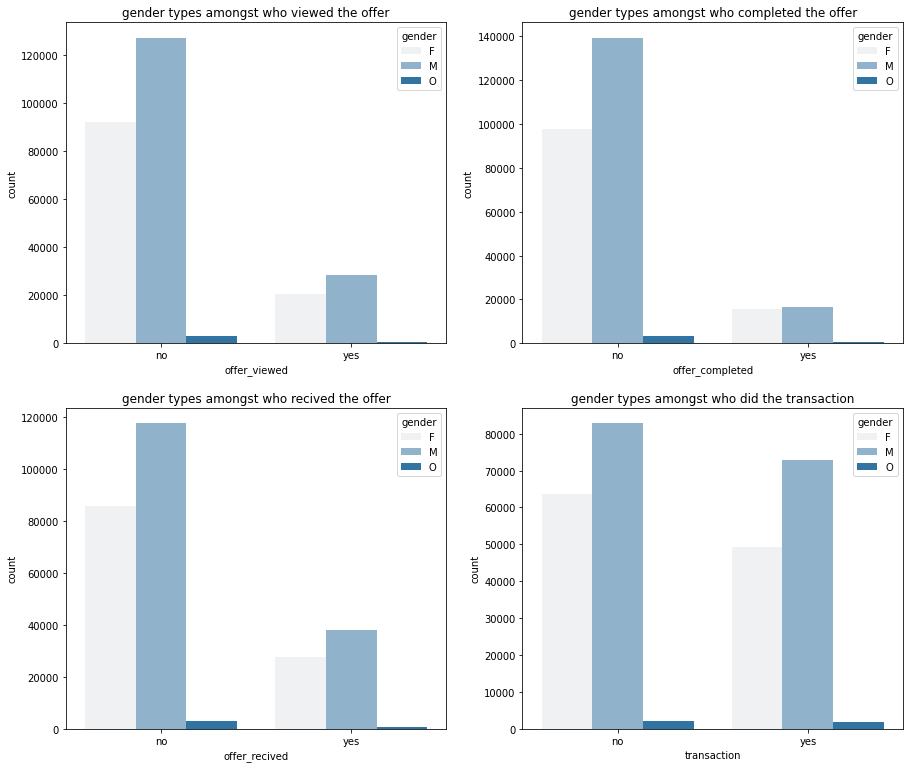

In [61]:
# Graph for gender amongst event types:

plt.subplots(2, 2, figsize=(15, 13))
color = sb.color_palette()[0]

plt.subplot(2,2,1)
x = sb.countplot(data = new_data, x = 'offer_viewed', hue = 'gender', color = color);
plt.title('gender types amongst who viewed the offer');
plt.ylabel('count');
plt.xlabel('offer_viewed');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

plt.subplot(2,2,2)
x = sb.countplot(data = new_data, x = 'offer_completed', hue = 'gender', color = color);
plt.title('gender types amongst who completed the offer');
plt.ylabel('count');
plt.xlabel('offer_completed');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

plt.subplot(2,2,3)
x = sb.countplot(data = new_data, x = 'offer_recived', hue = 'gender', color = color);
plt.title('gender types amongst who recived the offer');
plt.ylabel('count');
plt.xlabel('offer_recived');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

plt.subplot(2,2,4)
x = sb.countplot(data = new_data, x = 'transaction', hue = 'gender', color = color);
plt.title('gender types amongst who did the transaction');
plt.ylabel('count');
plt.xlabel('transaction');
xlabels = ['no', 'yes']
x.set_xticklabels(xlabels);
plt.xticks(rotation = 0);

In [63]:
# save data
offer_df.to_csv(path.data_processed_dir("offer_df.csv"), index=False)
offer_df.to_csv(G_processed/"offer_df.csv", index=False)